In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/dataset/traversal_cost_data.csv')

In [9]:
print(df.dtypes)

elevation                  float64
avg_traffic_speed          float64
pollution_level            float64
population_density         float64
road_quality_index         float64
proximity_main_roads       float64
weather_condition_index    float64
type_of_terrain             object
zone_classification         object
time_of_day                 object
traversal_cost             float64
dtype: object


In [10]:
df.isnull().sum()

elevation                  0
avg_traffic_speed          0
pollution_level            0
population_density         0
road_quality_index         0
proximity_main_roads       0
weather_condition_index    0
type_of_terrain            0
zone_classification        0
time_of_day                0
traversal_cost             0
dtype: int64

No null data in dataset

In [11]:
df.nunique()



elevation                  20000
avg_traffic_speed          20000
pollution_level            20000
population_density         20000
road_quality_index         20000
proximity_main_roads       20000
weather_condition_index    20000
type_of_terrain                4
zone_classification            3
time_of_day                    4
traversal_cost             20000
dtype: int64

In [12]:
df["type_of_terrain"].unique()

array(['Park', 'Residential Area', 'Road', 'Commercial Area'],
      dtype=object)

In [13]:
df["zone_classification"].unique()


array(['Commercial', 'Residential', 'Industrial'], dtype=object)

In [14]:
df["time_of_day"].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
categoricalColumns = ["type_of_terrain", "zone_classification", "time_of_day"]
oneHot = encoder.fit_transform(df[categoricalColumns])


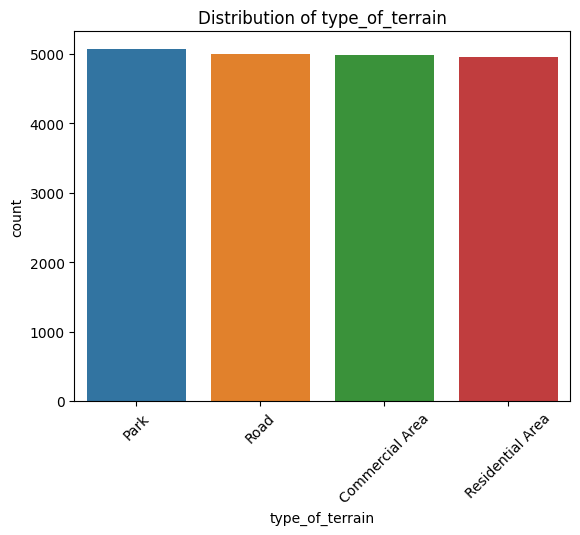

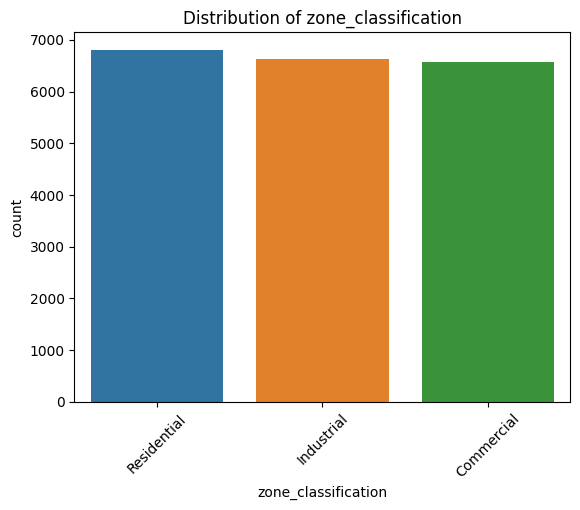

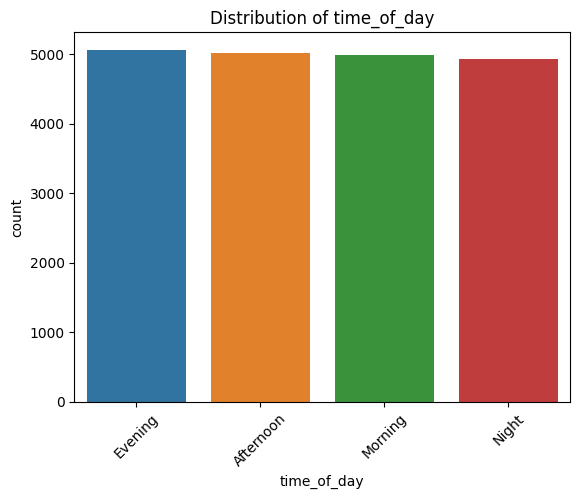

In [16]:
for col in categoricalColumns:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [17]:
featureNames = encoder.get_feature_names_out(categoricalColumns)
print(featureNames)

['type_of_terrain_Commercial Area' 'type_of_terrain_Park'
 'type_of_terrain_Residential Area' 'type_of_terrain_Road'
 'zone_classification_Commercial' 'zone_classification_Industrial'
 'zone_classification_Residential' 'time_of_day_Afternoon'
 'time_of_day_Evening' 'time_of_day_Morning' 'time_of_day_Night']


In [18]:
dfOneHot = pd.DataFrame(oneHot, columns=featureNames)


In [19]:
numericalColumns = ['elevation', 'avg_traffic_speed', 'pollution_level', 
                     'population_density', 'road_quality_index', 
                     'proximity_main_roads', 'weather_condition_index', 'traversal_cost']


In [20]:
dfProcessed = pd.concat([df[numericalColumns].reset_index(drop=True), dfOneHot], axis=1)


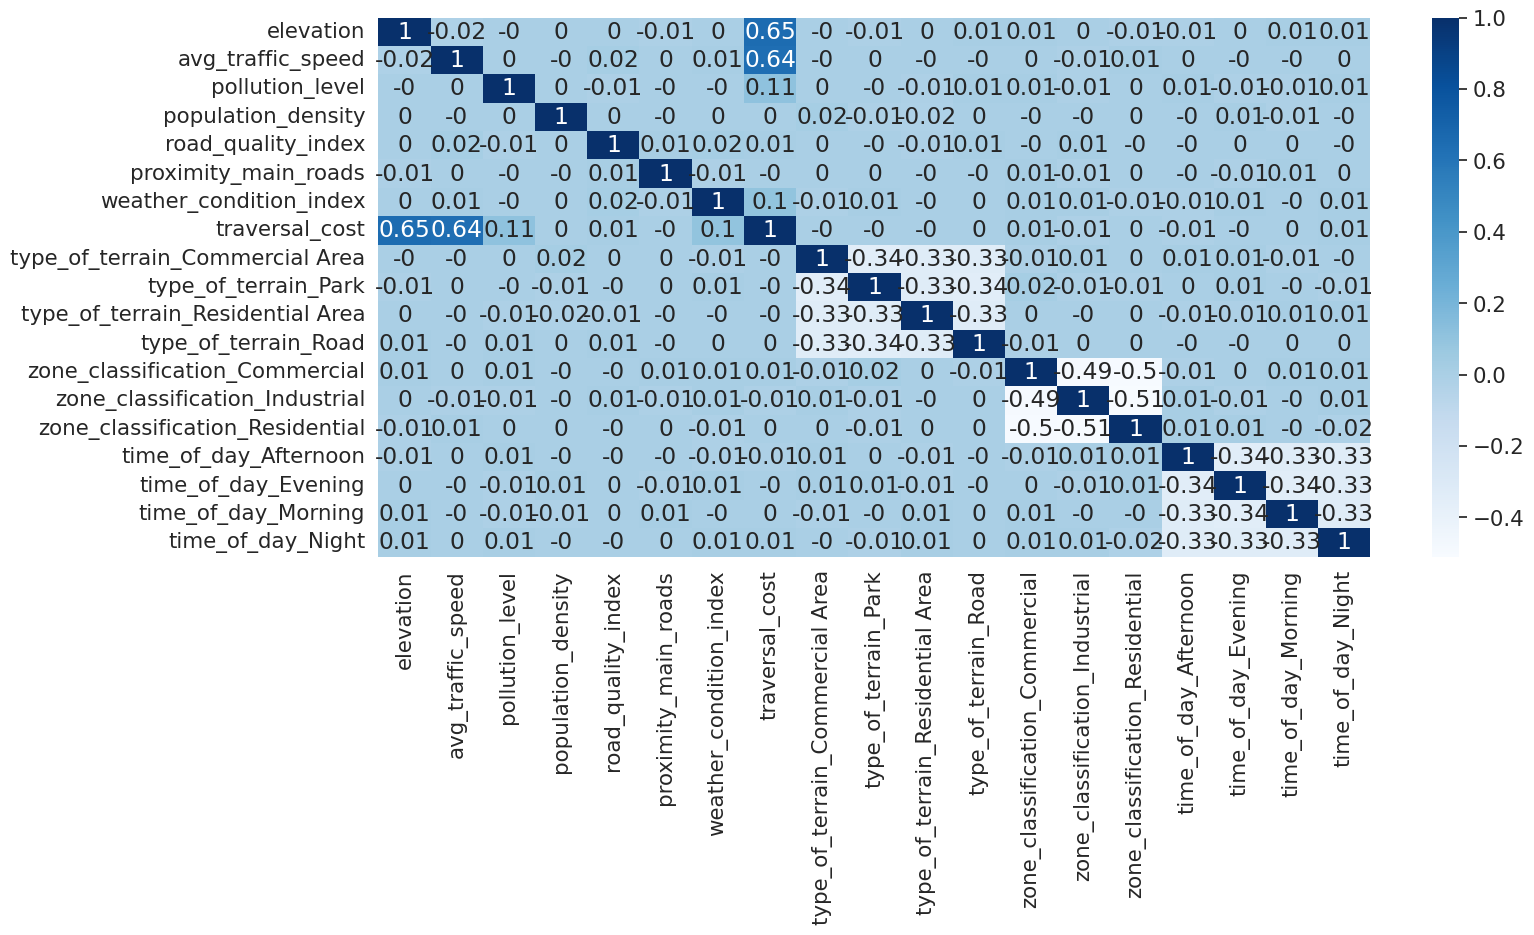

In [21]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(data=dfProcessed.corr().round(2),annot=True,cmap='Blues')

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

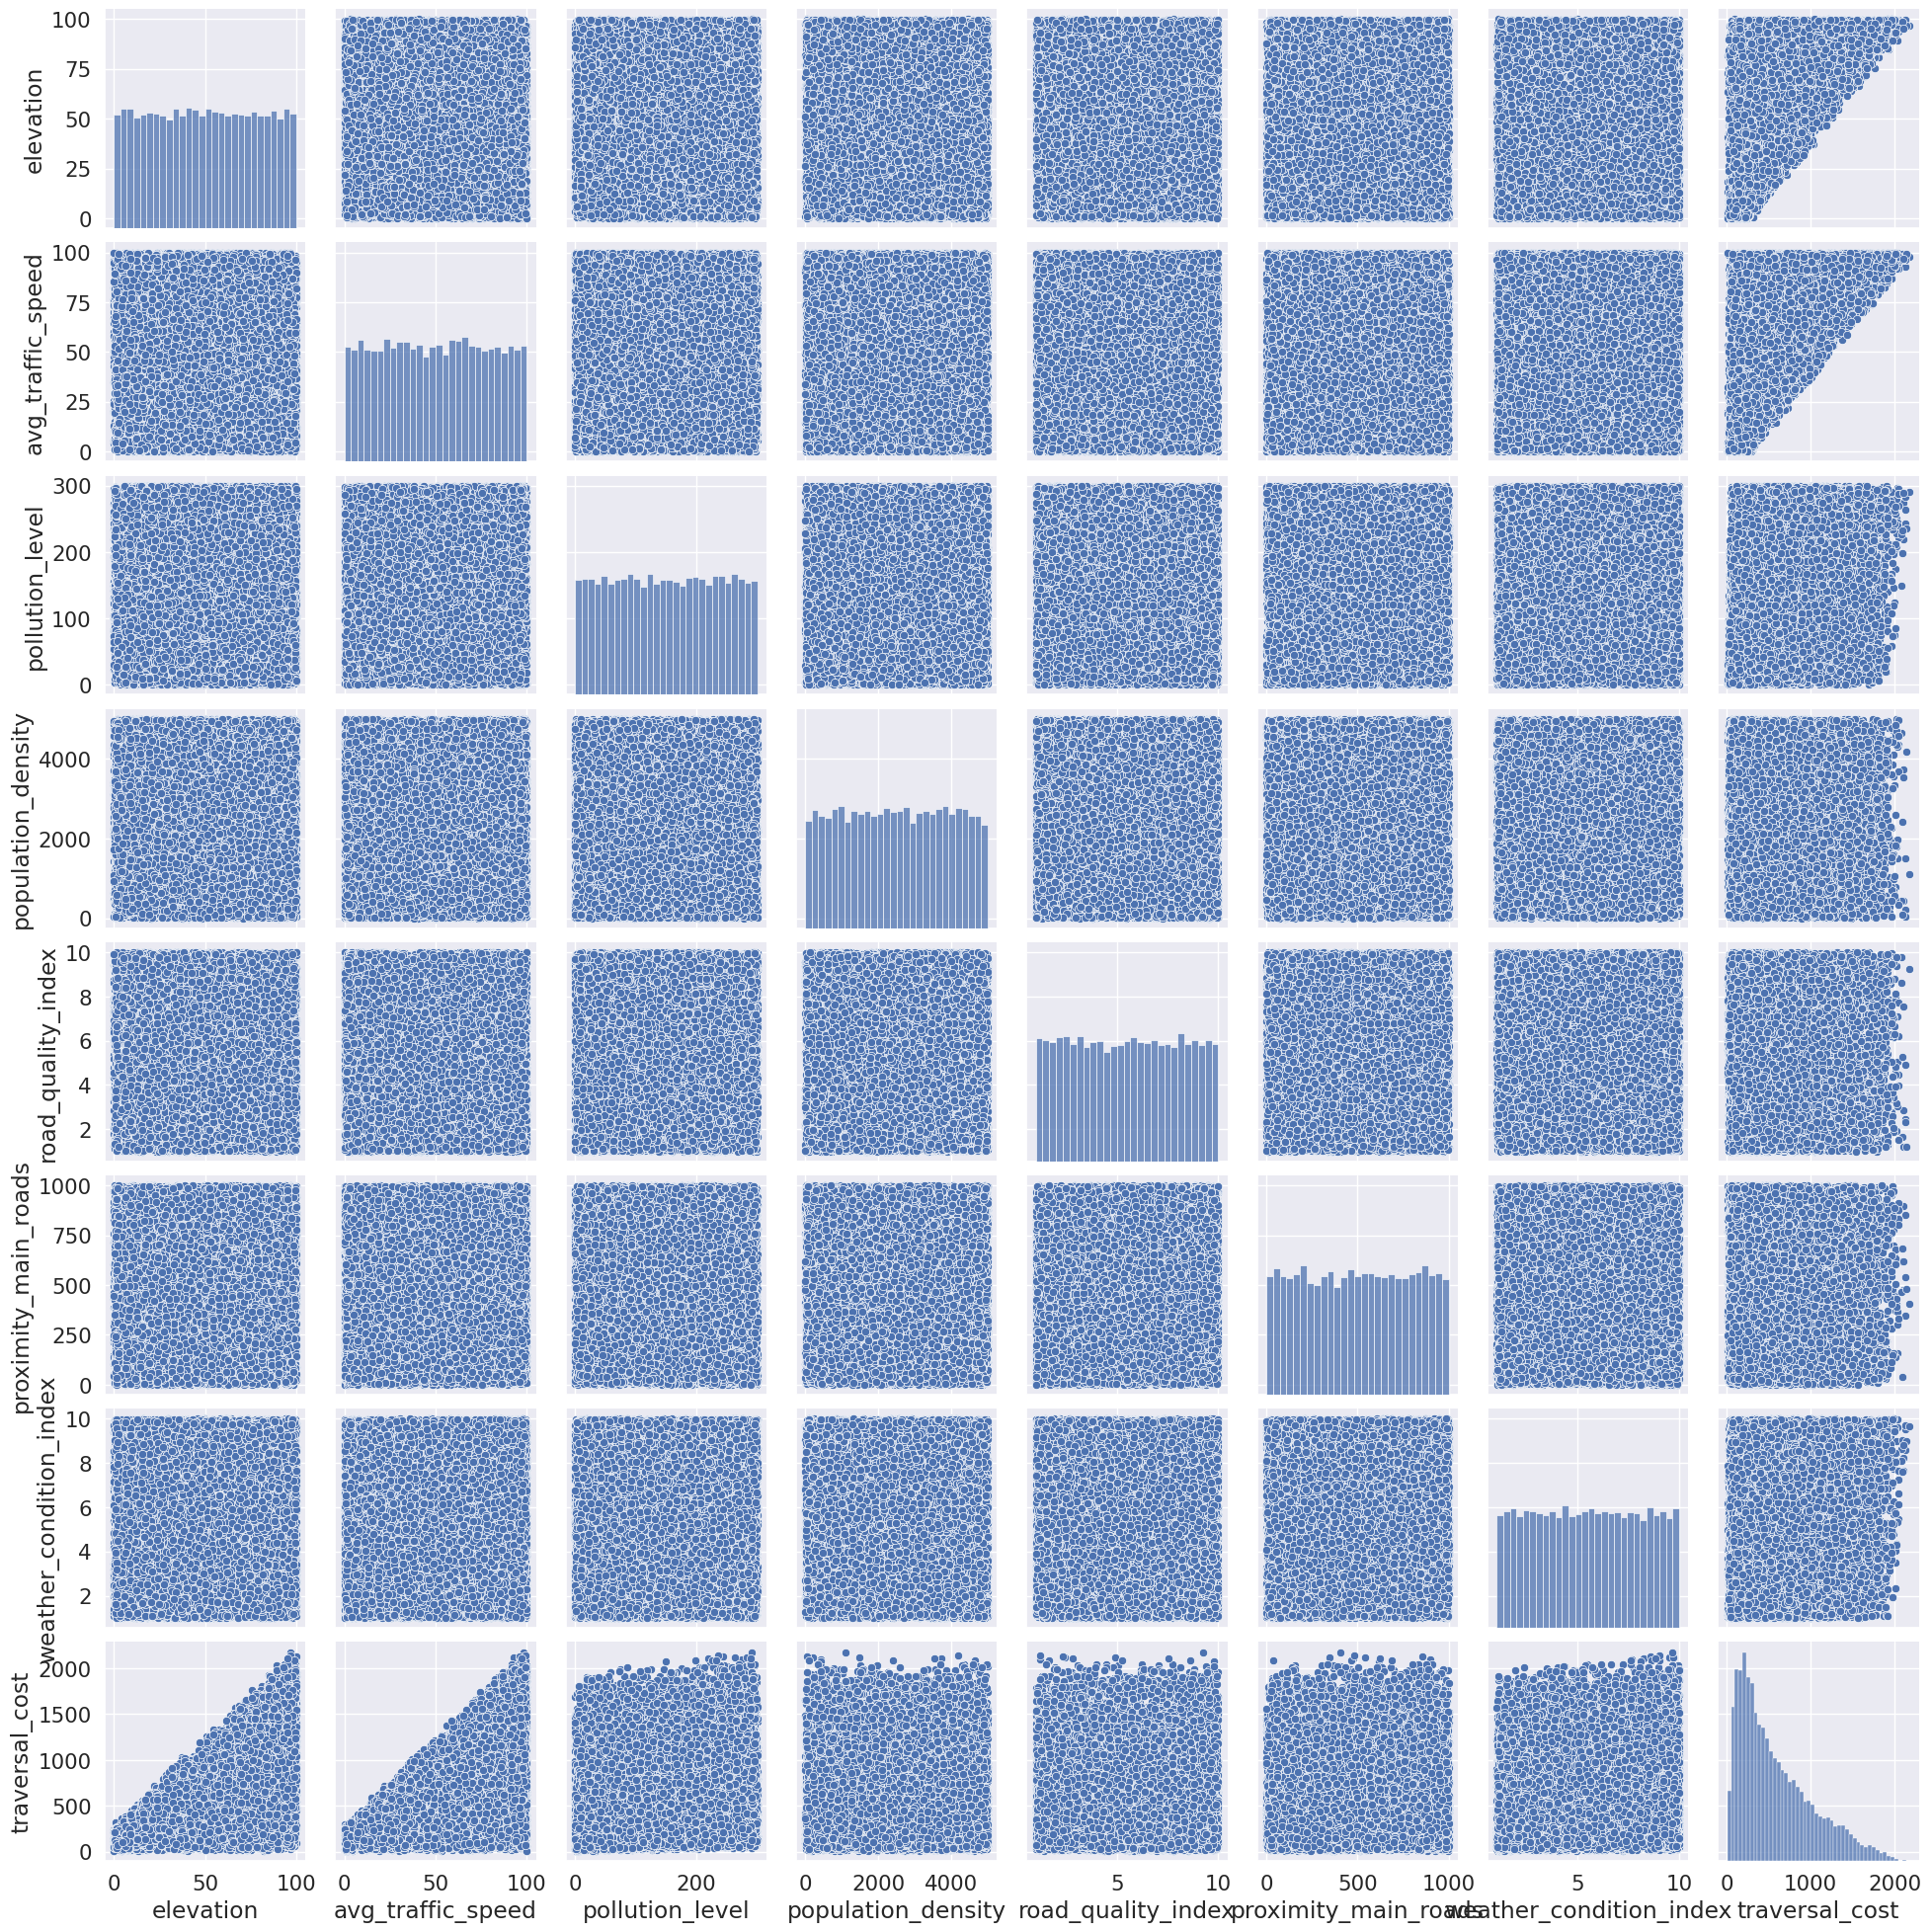

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
#dfProcessed.to_csv('/kaggle/working/traversal_cost_data_encoded.csv', index=False)


In [24]:
print(dfProcessed.dtypes)

elevation                           float64
avg_traffic_speed                   float64
pollution_level                     float64
population_density                  float64
road_quality_index                  float64
proximity_main_roads                float64
weather_condition_index             float64
traversal_cost                      float64
type_of_terrain_Commercial Area     float64
type_of_terrain_Park                float64
type_of_terrain_Residential Area    float64
type_of_terrain_Road                float64
zone_classification_Commercial      float64
zone_classification_Industrial      float64
zone_classification_Residential     float64
time_of_day_Afternoon               float64
time_of_day_Evening                 float64
time_of_day_Morning                 float64
time_of_day_Night                   float64
dtype: object


In [25]:
from sklearn.model_selection import train_test_split

Y = dfProcessed['traversal_cost']
X = dfProcessed.drop('traversal_cost', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16000, 18)
(16000,)
(4000, 18)
(4000,)


In [27]:
numerical_columns = ['elevation', 'avg_traffic_speed', 'pollution_level', 
                     'population_density', 'road_quality_index', 
                     'proximity_main_roads', 'weather_condition_index']

<Axes: >

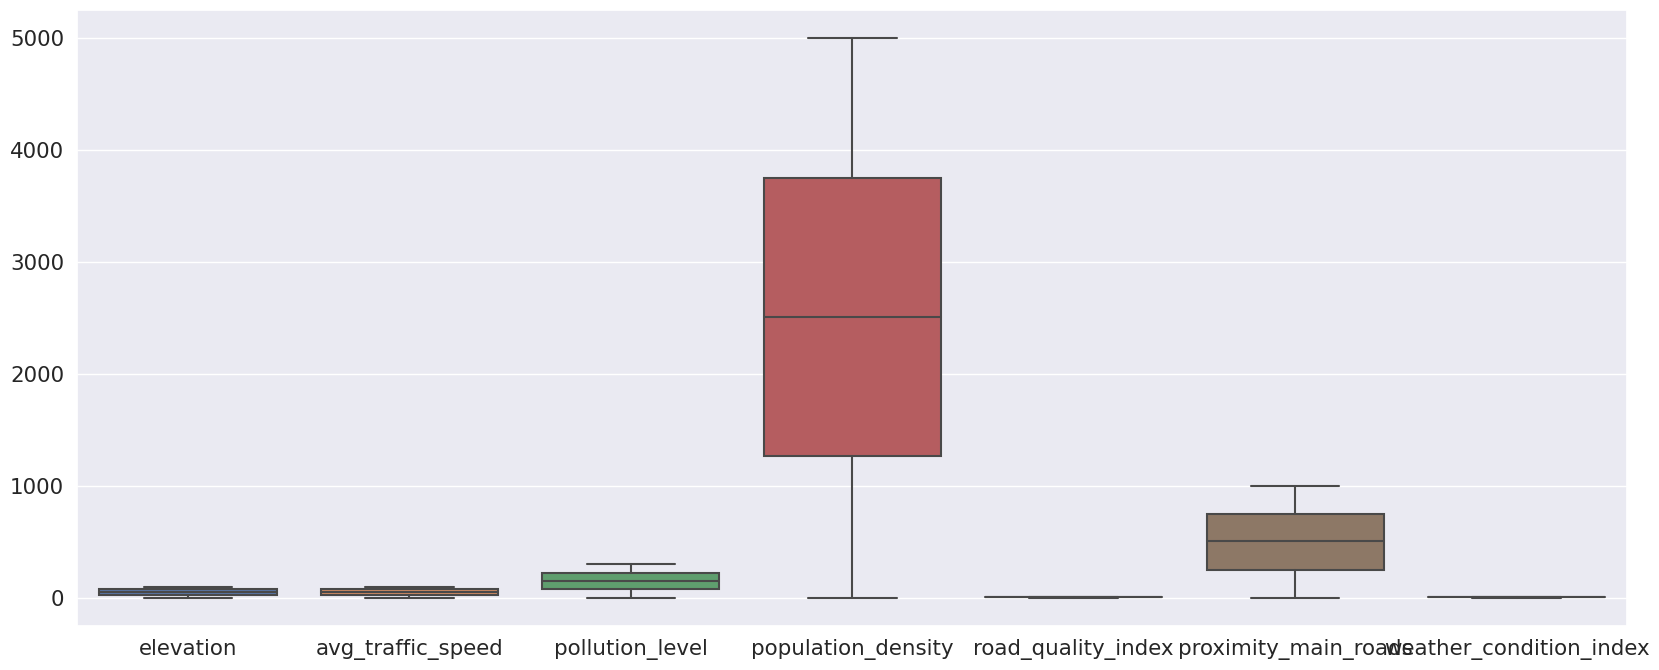

In [28]:


plt.figure(figsize=(20,8)) 
sns.boxplot(data=df[numerical_columns])

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[numerical_columns])

X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

<Axes: >

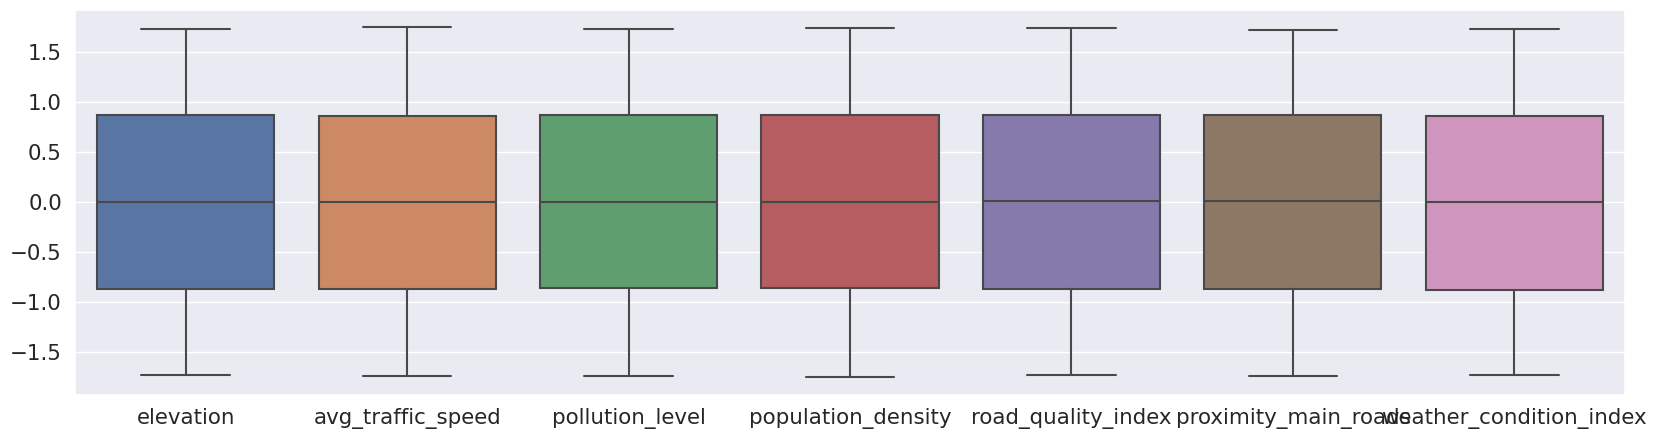

In [30]:
plt.figure(figsize=(20,5)) 
sns.boxplot(data=X_train[numerical_columns])

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

In [32]:
print(regressor.intercept_)
print(regressor.coef_)

584.8315548303183
[ 2.90205986e+02  2.85686868e+02  4.89300282e+01  4.54378166e-01
 -4.39152738e-01  1.09020954e+00  3.94896283e+01 -4.64770420e-01
  2.27545804e-02  5.90498170e-01 -1.48482331e-01  7.14335617e-02
 -1.55938161e+00  1.48794805e+00 -3.06817664e+00  2.44793133e+00
  3.55570403e+00 -2.93545873e+00]


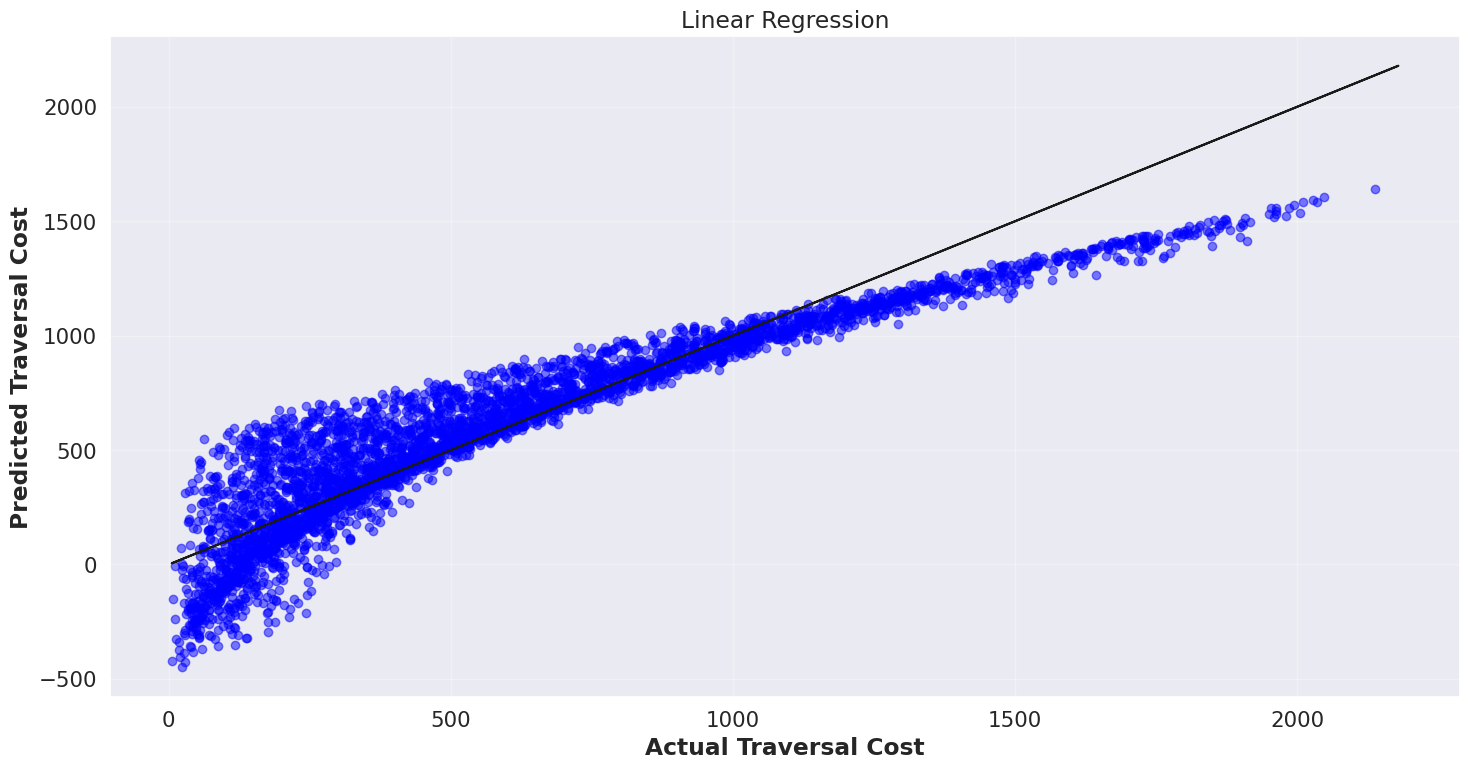

In [33]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(15, 8))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.5)
plt.plot(Y_train, Y_train,color='k')

plt.xlabel('Actual Traversal Cost', fontweight='bold')
plt.ylabel('Predicted Traversal Cost', fontweight='bold')
plt.title('Linear Regression')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 124.31001764922824
Mean Squared Error: 27446.31014130236
Root Mean Squared Error: 165.66927941324053


In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [36]:
regressor = LinearRegression()
regressor.fit(X_poly, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

1099565377735.887
[-1.78034910e+10  1.76219619e+12 -1.22374742e+12 ...  0.00000000e+00
  0.00000000e+00 -4.53021296e+10]


In [37]:
y_pred_test_poly = regressor.predict(X_test_poly)

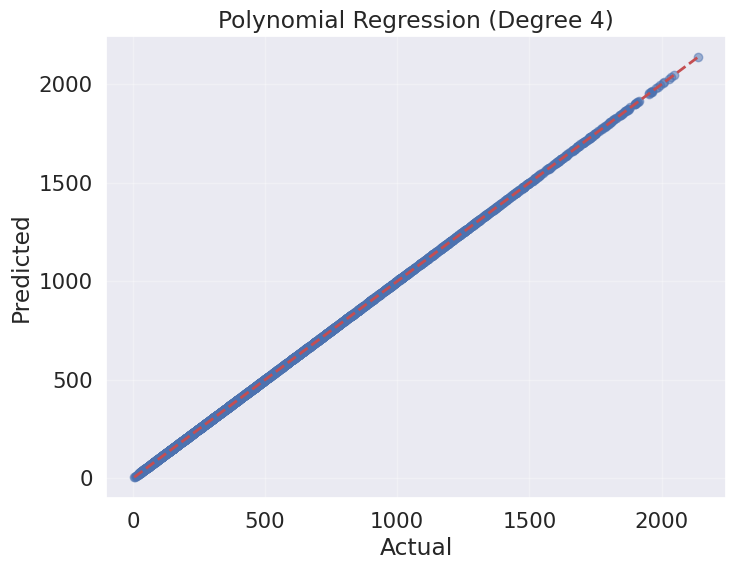

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_test_poly, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(alpha=0.3)
plt.title('Polynomial Regression (Degree 4)')
plt.show()

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_test_poly))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_test_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test_poly)))

Mean Absolute Error: 0.4422038717226541
Mean Squared Error: 0.30972503726788614
Root Mean Squared Error: 0.5565294576820585


In [41]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y_fresh = dfProcessed['traversal_cost']
X_fresh = dfProcessed.drop('traversal_cost', axis=1)

X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(X_fresh, Y_fresh, test_size=0.2, random_state=42)

scaler_nn = StandardScaler()
scaler_nn.fit(X_train_nn[numerical_columns])

X_train_nn[numerical_columns] = scaler_nn.transform(X_train_nn[numerical_columns])
X_val_nn[numerical_columns] = scaler_nn.transform(X_val_nn[numerical_columns])

X_test_nn = X_val_nn
Y_test_nn = Y_val_nn

model = Sequential([
    Input(shape=(18,)), 
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='mse',        
    metrics=['mae']    
)

model.summary()

hist = model.fit(
    X_train_nn, Y_train_nn,
    epochs=15,
    batch_size=20,
    validation_data=(X_val_nn, Y_val_nn),
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 496746.3438 - mae: 550.8352 - val_loss: 90146.2891 - val_mae: 207.7478
Epoch 2/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 60539.9141 - mae: 177.1654 - val_loss: 24235.2441 - val_mae: 112.6705
Epoch 3/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20854.7109 - mae: 106.8972 - val_loss: 13880.5693 - val_mae: 89.4085
Epoch 4/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13189.7676 - mae: 88.3138 - val_loss: 10074.0186 - val_mae: 77.9827
Epoch 5/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9361.7637 - mae: 75.2608 - val_loss: 7042.0532 - val_mae: 65.2129
Epoch 6/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6470.6973 - mae: 61.8893 - val_loss: 4467.8257 - val_mae: 50.3959
Epoch 7/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3938.5100 - mae: 47.2950 - val_loss: 2804.5374 - val_mae: 40.0679
Epoch 8/15
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2590.0974 - mae: 38.4481 - val_loss: 2054.21

In [42]:
y_pred_test = model.predict(X_test_nn, verbose=0).flatten()
train_rmse = np.sqrt(hist.history['loss'])
val_rmse = np.sqrt(hist.history['val_loss'])
y_pred = model.predict(X_val_nn).flatten()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


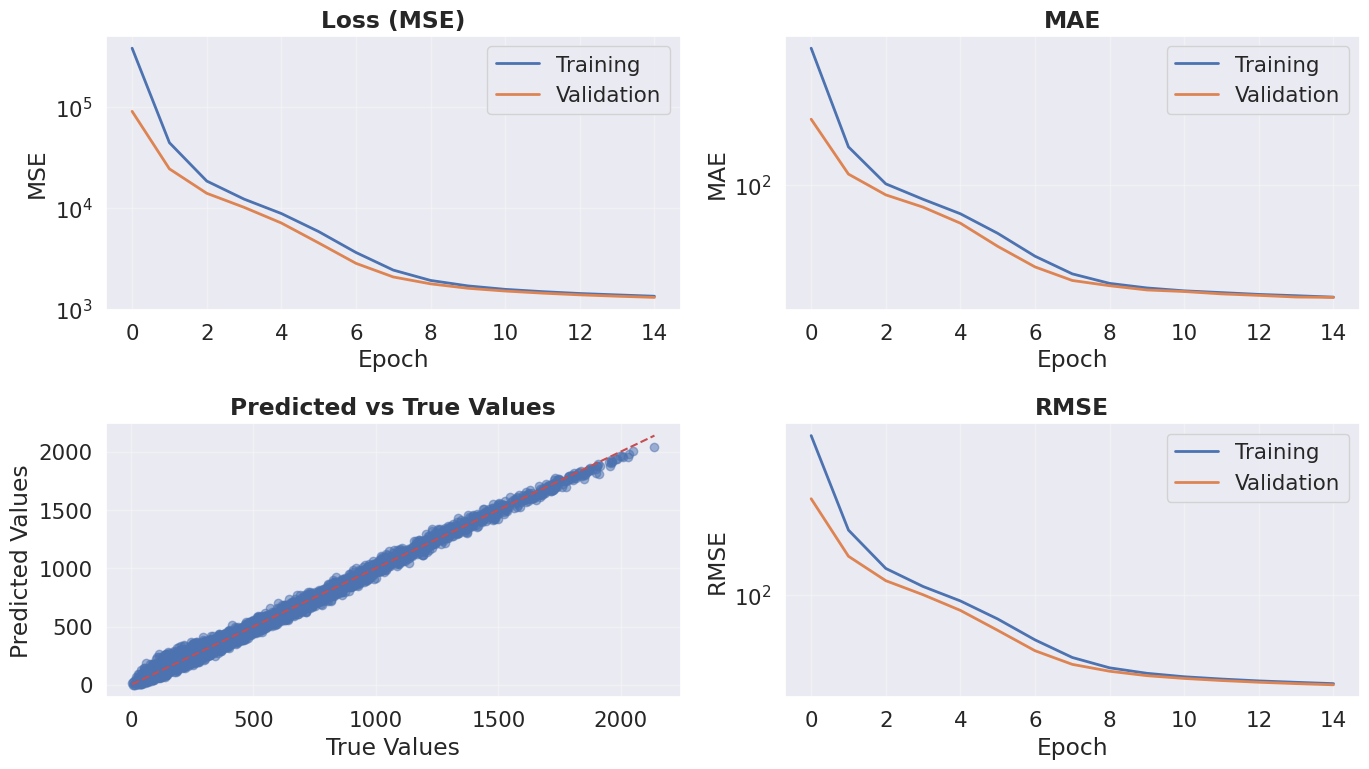

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0, 0].set_yscale('log')
axs[0, 0].plot(hist.history['loss'], label='Training', linewidth=2)
axs[0, 0].plot(hist.history['val_loss'], label='Validation', linewidth=2)
axs[0, 0].set_title('Loss (MSE)', fontweight='bold')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

axs[0, 1].set_yscale('log')
axs[0, 1].plot(hist.history['mae'], label='Training', linewidth=2)
axs[0, 1].plot(hist.history['val_mae'], label='Validation', linewidth=2)
axs[0, 1].set_title('MAE', fontweight='bold')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

axs[1, 0].scatter(Y_val_nn, y_pred, alpha=0.5)
axs[1, 0].plot(
    [Y_val_nn.min(), Y_val_nn.max()],
    [Y_val_nn.min(), Y_val_nn.max()],
    'r--'
)
axs[1, 0].set_title('Predicted vs True Values', fontweight='bold')
axs[1, 0].set_xlabel('True Values')
axs[1, 0].set_ylabel('Predicted Values')
axs[1, 0].grid(alpha=0.3)

axs[1, 1].set_yscale('log')
axs[1, 1].plot(train_rmse, label='Training', linewidth=2)
axs[1, 1].plot(val_rmse, label='Validation', linewidth=2)
axs[1, 1].set_title('RMSE', fontweight='bold')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [44]:
from sklearn.metrics import r2_score
print('R² Score:', r2_score(Y_test_nn, y_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_nn, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_nn, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_nn, y_pred_test)))

R² Score: 0.9932665880647837
Mean Absolute Error: 28.533019976015503
Mean Squared Error: 1288.8018232869638
Root Mean Squared Error: 35.89988611802221


In [45]:
from bayes_opt import BayesianOptimization

Y_fresh = dfProcessed['traversal_cost']
X_fresh = dfProcessed.drop('traversal_cost', axis=1)

X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(X_fresh, Y_fresh, test_size=0.2, random_state=42)

scaler_nn = StandardScaler()
scaler_nn.fit(X_train_nn[numerical_columns])

X_train_nn[numerical_columns] = scaler_nn.transform(X_train_nn[numerical_columns])
X_val_nn[numerical_columns] = scaler_nn.transform(X_val_nn[numerical_columns])

X_test_nn = X_val_nn
Y_test_nn = Y_val_nn


def nn_bo(neurons1, neurons2, neurons3, activation, learning_rate, batch_size, epochs, dropout_rate):
    activationL = ['relu', 'sigmoid', 'tanh', 'selu', 'elu']
    neurons1 = round(neurons1)
    neurons2 = round(neurons2)
    neurons3 = round(neurons3)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)

    model = Sequential([
        Input(shape=(18,)),
        Dense(int(neurons1), activation=activation),
        Dropout(dropout_rate, seed=42),
        Dense(int(neurons2), activation=activation),
        Dropout(dropout_rate, seed=42),
        Dense(int(neurons3), activation=activation),
        Dropout(dropout_rate, seed=42),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    
    model.fit(X_train_nn, Y_train_nn, epochs=epochs, batch_size=batch_size, 
              verbose=0, validation_split=0.2)
    
    val_loss = model.evaluate(X_val_nn, Y_val_nn, verbose=0)[0]
    
    return -val_loss if not np.isnan(val_loss) else -100000

params_nn = {
    'neurons1': (32, 256),
    'neurons2': (32, 256),
    'neurons3': (32, 64),
    'activation': (0, 4),
    'learning_rate': (0.0001, 0.01),
    'batch_size': (20, 50),
    'epochs': (10, 100),
    'dropout_rate': (0.1, 0.7),
}

nn_optimizer = BayesianOptimization(nn_bo, params_nn, random_state=42)
nn_optimizer.maximize(init_points=25, n_iter=3)

activationL = ['relu', 'sigmoid', 'tanh', 'selu', 'elu']
best_params = nn_optimizer.max['params']
best_params['activation'] = activationL[round(best_params['activation'])]


model = Sequential([
    Input(shape=(18,)),
    Dense(int(best_params['neurons1']), activation=best_params['activation']),
    Dropout(best_params['dropout_rate'], seed=42),
    Dense(int(best_params['neurons2']), activation=best_params['activation']),
    Dropout(best_params['dropout_rate'], seed=42),
    Dense(int(best_params['neurons3']), activation=best_params['activation']),
    Dropout(best_params['dropout_rate'], seed=42),
    Dense(1)
])

optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

model.summary()

hist = model.fit(
    X_train_nn, Y_train_nn,
    epochs=int(best_params['epochs']),
    batch_size=int(best_params['batch_size']),
    validation_data=(X_val_nn, Y_val_nn),
    verbose=1
)

|   iter    |  target   | neurons1  | neurons2  | neurons3  | activa... | learni... | batch_... |  epochs   | dropou... |
-------------------------------------------------------------------------------------------------------------------------
| 1         | -130238.5 | 115.89698 | 244.96000 | 55.423806 | 2.3946339 | 0.0016445 | 24.679835 | 15.227525 | 0.6197056 |
| 2         | -1539.541 | 166.64976 | 190.60825 | 32.658703 | 3.8796394 | 0.0083411 | 26.370173 | 26.364247 | 0.2100427 |
| 3         | -1086.457 | 100.15026 | 149.54544 | 45.822240 | 1.1649165 | 0.0061573 | 24.184815 | 36.293018 | 0.3198171 |
| 4         | -7741.045 | 134.15967 | 207.87941 | 38.389561 | 2.0569377 | 0.0059649 | 21.393512 | 64.679036 | 0.2023144 |
| 5         | -2125.373 | 46.571556 | 244.55036 | 62.900225 | 3.2335893 | 0.0031156 | 22.930163 | 71.580972 | 0.3640914 |
| 6         | -2212.674 | 59.336564 | 142.91962 | 33.100432 | 3.6372816 | 0.0026619 | 39.875668 | 38.053996 | 0.4120408 |
| 7         | -12514.39 

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)               │ (None, 94)             │         1,786 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 94)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 153)            │        14,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 153)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 36)             │         5,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 1)              │            37 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,902 (85.55 KB)

 Trainable params: 21,902 (85.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 309983.5312 - mae: 396.1837 - val_loss: 19642.5371 - val_mae: 110.4760
Epoch 2/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29662.3359 - mae: 137.7789 - val_loss: 10048.6992 - val_mae: 76.7669
Epoch 3/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 20974.6152 - mae: 110.8074 - val_loss: 6942.8687 - val_mae: 59.8119
Epoch 4/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17895.2363 - mae: 99.6832 - val_loss: 4034.7668 - val_mae: 45.7722
Epoch 5/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14671.2412 - mae: 87.2844 - val_loss: 2308.8567 - val_mae: 32.1909
Epoch 6/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12502.0674 - mae: 79.3184 - val_loss: 1470.9403 - val_mae: 27.6761
Epoch 7/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12493.1992 - mae: 78.8301 - val_loss: 1299.5826 - val_mae: 26.4842
Epoch 8/79
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11761.4014 - mae: 75.7973 - val_loss: 1221.8

In [46]:
y_pred_test = model.predict(X_test_nn, verbose=0).flatten()
train_rmse = np.sqrt(hist.history['loss'])
val_rmse = np.sqrt(hist.history['val_loss'])
y_pred = model.predict(X_val_nn).flatten()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


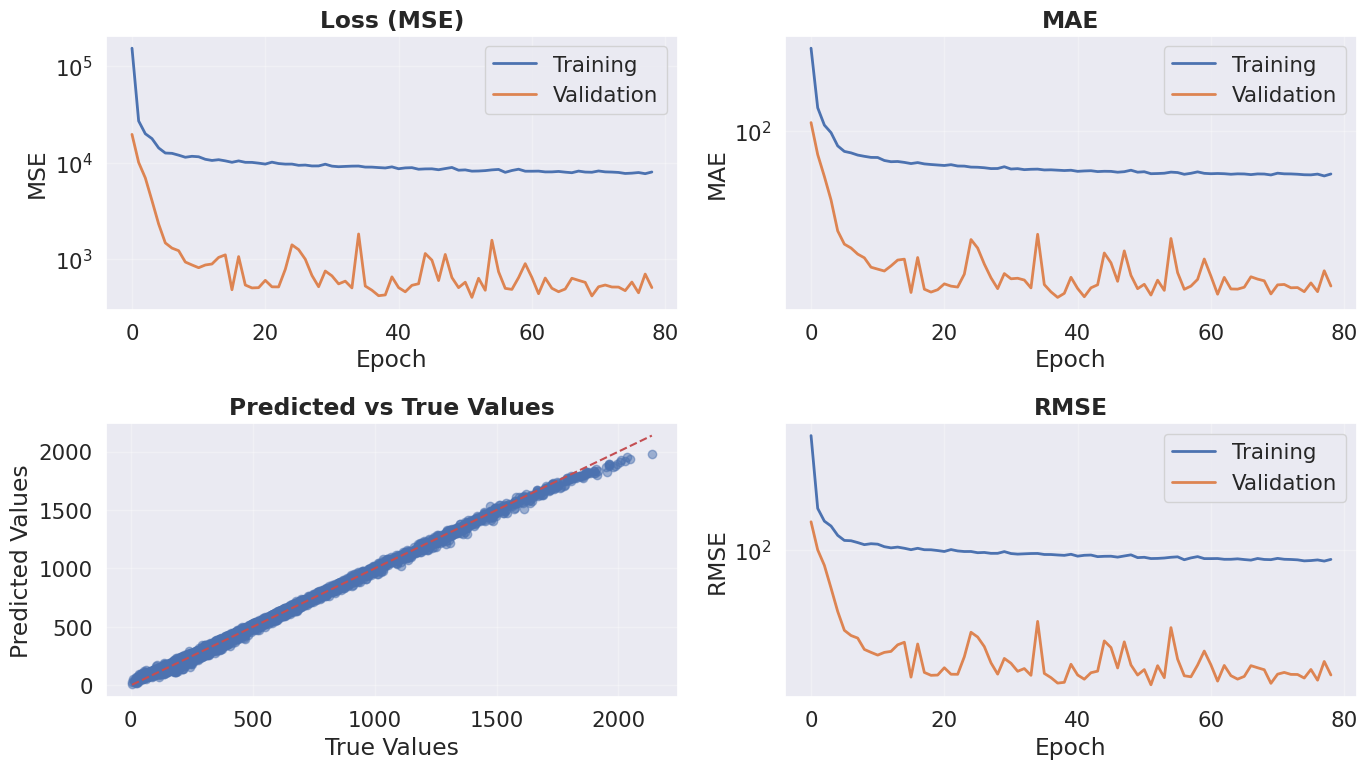

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0, 0].set_yscale('log')
axs[0, 0].plot(hist.history['loss'], label='Training', linewidth=2)
axs[0, 0].plot(hist.history['val_loss'], label='Validation', linewidth=2)
axs[0, 0].set_title('Loss (MSE)', fontweight='bold')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

axs[0, 1].set_yscale('log')
axs[0, 1].plot(hist.history['mae'], label='Training', linewidth=2)
axs[0, 1].plot(hist.history['val_mae'], label='Validation', linewidth=2)
axs[0, 1].set_title('MAE', fontweight='bold')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

axs[1, 0].scatter(Y_val_nn, y_pred, alpha=0.5)
axs[1, 0].plot(
    [Y_val_nn.min(), Y_val_nn.max()],
    [Y_val_nn.min(), Y_val_nn.max()],
    'r--'
)
axs[1, 0].set_title('Predicted vs True Values', fontweight='bold')
axs[1, 0].set_xlabel('True Values')
axs[1, 0].set_ylabel('Predicted Values')
axs[1, 0].grid(alpha=0.3)

axs[1, 1].set_yscale('log')
axs[1, 1].plot(train_rmse, label='Training', linewidth=2)
axs[1, 1].plot(val_rmse, label='Validation', linewidth=2)
axs[1, 1].set_title('RMSE', fontweight='bold')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
print('R² Score:', r2_score(Y_test_nn, y_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_nn, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_nn, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_nn, y_pred_test)))
print(params_nn)

R² Score: 0.9973552030340083
Mean Absolute Error: 17.17684063859733
Mean Squared Error: 506.22465769048773
Root Mean Squared Error: 22.4994368305184
{'neurons1': (32, 256), 'neurons2': (32, 256), 'neurons3': (32, 64), 'activation': (0, 4), 'learning_rate': (0.0001, 0.01), 'batch_size': (20, 50), 'epochs': (10, 100), 'dropout_rate': (0.1, 0.7)}


In [49]:
print(best_params)

{'neurons1': 94.9293301699733, 'neurons2': 153.56392262744765, 'neurons3': 36.509575199192405, 'activation': 'selu', 'learning_rate': 0.0008380513724297313, 'batch_size': 49.60660809801552, 'epochs': 79.50202923669917, 'dropout_rate': 0.21922940892050344}


In [51]:
import plotly.express as px
import plotly.graph_objects as go

paramlist = [i for i in nn_optimizer.res if abs(i['target']) < 50000]

params_list = [ii['params'] for ii in paramlist]
targets = [ii['target'] for ii in paramlist]

temp = pd.DataFrame(params_list)
temp['targets'] = targets

fig = px.parallel_coordinates(temp,
                              color="targets",
                              dimensions=temp.columns,
                              color_continuous_scale=px.colors.diverging.RdYlBu,
                              color_continuous_midpoint=temp['targets'].median(),
                              title="ANN Hyperparameter Optimization using Bayesian Optimizer")
fig.show()

categories = [col for col in temp.columns if col != 'targets']
temp.reset_index(drop=True, inplace=True)
ind = np.argsort(np.abs(targets))

print(f"Best score: {targets[ind[-1]]:.2f}")
print(f"2nd best score: {targets[ind[-2]]:.2f}")
print(f"3rd best score: {targets[ind[-3]]:.2f}")

fig = go.Figure()



Best score: -26752.98
2nd best score: -17561.11
3rd best score: -15948.65


In [52]:
grid = pd.read_csv('/kaggle/input/provided-grid/provided_grid.csv')

In [53]:
grid.shape

(400, 10)

In [54]:
grid.head

<bound method NDFrame.head of      elevation  avg_traffic_speed  pollution_level  population_density  \
0    37.454012          10.312387       212.171590         3791.315980   
1    95.071431          90.255291        45.761713          122.934582   
2    73.199394          50.525237       172.886508          110.617758   
3    59.865848          82.645747       182.014514         1618.051096   
4    15.601864          32.004960       127.239201         2443.215952   
..         ...                ...              ...                 ...   
395  93.075733          87.212391       261.461042         2891.934585   
396  85.841275          93.211828       292.046691         1370.803333   
397  42.899403          56.513318       290.663357          397.096845   
398  75.087107          69.665082       224.895550          428.291248   
399  75.454287          92.249938        39.025872         4470.954373   

     road_quality_index  proximity_main_roads  weather_condition_index  \
0      

In [55]:
categoricalColumns = ["type_of_terrain", "zone_classification", "time_of_day"]
oneHot_grid = encoder.fit_transform(grid[categoricalColumns])
featureNames_grid = encoder.get_feature_names_out(categoricalColumns)
dfOneHot_grid = pd.DataFrame(oneHot_grid, columns=featureNames_grid)

In [57]:
numerical_columns = ['elevation', 'avg_traffic_speed', 'pollution_level', 
                     'population_density', 'road_quality_index', 
                     'proximity_main_roads', 'weather_condition_index']
grid_processed = pd.concat([grid[numerical_columns].reset_index(drop=True), dfOneHot_grid], axis=1)

In [58]:
grid_scaled = grid_processed.copy()
grid_scaled[numerical_columns] = scaler.transform(grid_processed[numerical_columns])

In [59]:
nn_predictions = model.predict(grid_scaled, verbose=0).flatten()

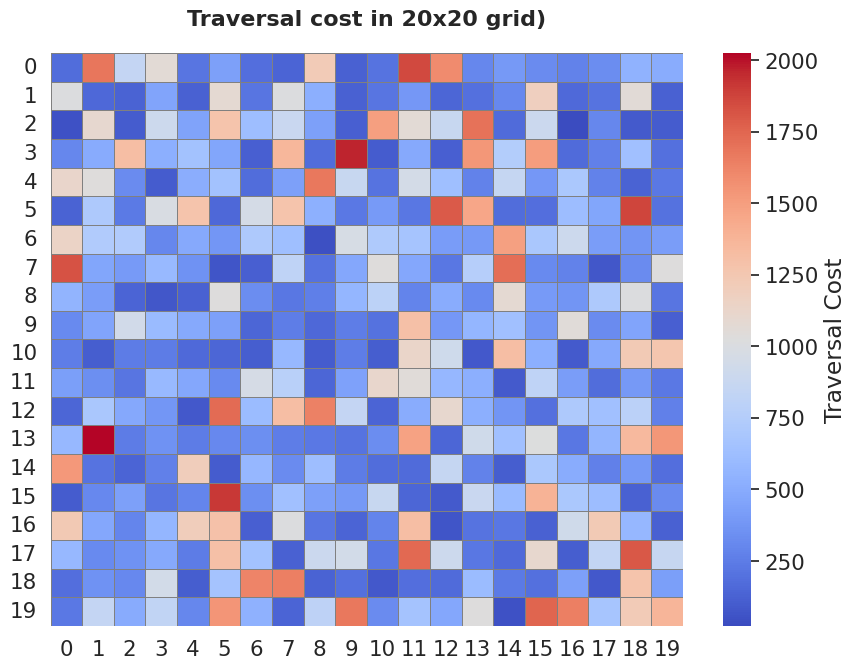

In [60]:
grid_size = 20
cost_grid = nn_predictions.reshape(grid_size, grid_size)

plt.figure(figsize=(9, 7))
sns.heatmap(cost_grid, 
            annot=False,  
            fmt='.0f',   
            cmap="coolwarm",  
            cbar_kws={'label': 'Traversal Cost'},
            linewidths=0.5,
            linecolor='gray')

plt.title('Traversal cost in 20x20 grid)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [62]:
grid_save = pd.DataFrame(cost_grid, 
                               columns=[f'Col_{i}' for i in range(grid_size)],
                               index=[f'Row_{i}' for i in range(grid_size)])

grid_save.to_csv('/kaggle/working/Estimated_grid.csv', index=False)

In [63]:
print(grid_save)

              Col_0        Col_1        Col_2        Col_3        Col_4  \
Row_0    173.399734  1685.277832   844.814209  1070.212646   217.513275   
Row_1   1011.770935   156.137207   131.854660   459.630463   120.839729   
Row_2     54.222183  1098.431641    96.177605   903.528625   447.973602   
Row_3    297.708099   499.243774  1319.586548   521.939331   649.406311   
Row_4   1121.352173  1031.855591   320.852356   100.661171   510.203430   
Row_5    133.060043   713.974182   241.145096   989.219910  1277.121704   
Row_6   1143.775146   726.971985   729.105774   297.920776   490.968933   
Row_7   1822.255859   466.371155   398.876099   591.005188   358.110535   
Row_8    550.901855   417.597412   137.433807    71.850113   125.006798   
Row_9    318.786102   459.865051   931.788147   595.581360   490.426727   
Row_10   255.807678   102.413490   247.958496   244.101669   162.069763   
Row_11   422.945618   340.733063   217.956009   591.337585   473.319885   
Row_12   142.721146   693

In [64]:
grid_save.shape

(20, 20)

In [65]:
def grid_to_graph(grid):
    rows, cols = grid.shape
    graph = {}
    
    for row in range(rows):
        for col in range(cols):
            node = (row, col)
            neighbors = []
            
            for dr, dc in [(-1, 0), (0, -1), (1, 0), (0, 1)]:
                new_row, new_col = row + dr, col + dc
                if 0 <= new_row < rows and 0 <= new_col < cols:
                    neighbors.append((new_row, new_col))
            
            graph[node] = neighbors
    
    return graph

In [66]:
graph = grid_to_graph(grid_save)

In [67]:
print(graph)

{(0, 0): [(1, 0), (0, 1)], (0, 1): [(0, 0), (1, 1), (0, 2)], (0, 2): [(0, 1), (1, 2), (0, 3)], (0, 3): [(0, 2), (1, 3), (0, 4)], (0, 4): [(0, 3), (1, 4), (0, 5)], (0, 5): [(0, 4), (1, 5), (0, 6)], (0, 6): [(0, 5), (1, 6), (0, 7)], (0, 7): [(0, 6), (1, 7), (0, 8)], (0, 8): [(0, 7), (1, 8), (0, 9)], (0, 9): [(0, 8), (1, 9), (0, 10)], (0, 10): [(0, 9), (1, 10), (0, 11)], (0, 11): [(0, 10), (1, 11), (0, 12)], (0, 12): [(0, 11), (1, 12), (0, 13)], (0, 13): [(0, 12), (1, 13), (0, 14)], (0, 14): [(0, 13), (1, 14), (0, 15)], (0, 15): [(0, 14), (1, 15), (0, 16)], (0, 16): [(0, 15), (1, 16), (0, 17)], (0, 17): [(0, 16), (1, 17), (0, 18)], (0, 18): [(0, 17), (1, 18), (0, 19)], (0, 19): [(0, 18), (1, 19)], (1, 0): [(0, 0), (2, 0), (1, 1)], (1, 1): [(0, 1), (1, 0), (2, 1), (1, 2)], (1, 2): [(0, 2), (1, 1), (2, 2), (1, 3)], (1, 3): [(0, 3), (1, 2), (2, 3), (1, 4)], (1, 4): [(0, 4), (1, 3), (2, 4), (1, 5)], (1, 5): [(0, 5), (1, 4), (2, 5), (1, 6)], (1, 6): [(0, 6), (1, 5), (2, 6), (1, 7)], (1, 7): [(

In [68]:
def dfs_find_path(graph, start, end, visited=None, path=None):
    if visited is None:
        visited = set()

    if path is None:
        path = [start]

    visited.add(start)

    if start == end:
        return path

    for next_node in graph[start]:
        if next_node not in visited:
            found_path = dfs_find_path(graph, next_node, end, visited.copy(), path + [next_node])
            if found_path:  
                return found_path

    return None  

path = dfs_find_path(graph, (0, 0), (19, 19))


In [69]:
print(path)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (19, 1), (18, 1), (17, 1), (16, 1), (15, 1), (14, 1), (13, 1), (12, 1), (11, 1), (10, 1), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (19, 3), (18, 3), (17, 3), (16, 3), (15, 3), (14, 3), (13, 3), (12, 3), (11, 3), (10, 3), (9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (19, 5), (18, 5), (17, 5), (16, 5), (15, 5), (14, 5), (13, 5), (12, 5), (11, 5), (10, 5), (9, 5), (8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (2,

In [70]:
len(path)

381

In [72]:
from collections import deque

def breadth_first_search(graph, start, end):
    queue = deque([start])

    visited = set([start])

    parent = {start: None}

    while queue:
        
        node = queue.popleft()

        if node == end:
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1]  

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)

                parent[neighbor] = node

                queue.append(neighbor)

    return None

path = breadth_first_search(graph, (0, 0), (19, 19))

In [73]:

print(path)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8), (19, 9), (19, 10), (19, 11), (19, 12), (19, 13), (19, 14), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19)]


In [74]:
len(path)

39

In [75]:
def grid_to_graph(grid):
    rows, cols = grid.shape
    graph = {}
    
    for row in range(rows):
        for col in range(cols):
            node = (row, col)
            neighbors = {}
            
            for dr, dc in [(-1, 0), (0, -1), (1, 0), (0, 1)]:
                new_row, new_col = row + dr, col + dc
                if 0 <= new_row < rows and 0 <= new_col < cols:
                    weight = grid.loc[f'Row_{new_row}', f'Col_{new_col}']
                    neighbors[(new_row, new_col)] = weight
            
            graph[node] = neighbors
    
    return graph

In [76]:
graphWeight = grid_to_graph(grid_save)

In [77]:
print(graphWeight)

{(0, 0): {(1, 0): 1011.77094, (0, 1): 1685.2778}, (0, 1): {(0, 0): 173.39973, (1, 1): 156.1372, (0, 2): 844.8142}, (0, 2): {(0, 1): 1685.2778, (1, 2): 131.85466, (0, 3): 1070.2126}, (0, 3): {(0, 2): 844.8142, (1, 3): 459.63046, (0, 4): 217.51328}, (0, 4): {(0, 3): 1070.2126, (1, 4): 120.83973, (0, 5): 436.2784}, (0, 5): {(0, 4): 217.51328, (1, 5): 1078.8783, (0, 6): 185.15894}, (0, 6): {(0, 5): 436.2784, (1, 6): 213.90465, (0, 7): 135.03218}, (0, 7): {(0, 6): 185.15894, (1, 7): 1014.1642, (0, 8): 1223.476}, (0, 8): {(0, 7): 135.03218, (1, 8): 516.13135, (0, 9): 119.74775}, (0, 9): {(0, 8): 1223.476, (1, 9): 118.518654, (0, 10): 205.9226}, (0, 10): {(0, 9): 119.74775, (1, 10): 211.3744, (0, 11): 1857.8229}, (0, 11): {(0, 10): 205.9226, (1, 11): 386.2935, (0, 12): 1591.7146}, (0, 12): {(0, 11): 1857.8229, (1, 12): 141.28607, (0, 13): 299.68463}, (0, 13): {(0, 12): 1591.7146, (1, 13): 191.76828, (0, 14): 393.21436}, (0, 14): {(0, 13): 299.68463, (1, 14): 311.57068, (0, 15): 326.1518}, (0,

In [78]:
def Dijkstra(G, source):
   
    D = {}   
    parent = {}
    Q = {}   

    D[source] = 0

    for u in G:
        if u != source:
            D[u] = float('inf')  
        parent[u] = None
        Q[u] = D[u]

    while Q:
        u = min(Q, key=Q.get)
        Q.pop(u)

        for z, w in G[u].items():
            alt = D[u] + w
            if z in Q and alt < D[z]:  
                D[z] = alt
                parent[z] = u
                Q[z] = alt

    return D, parent

In [79]:
source = (0,0)
distance, parent = Dijkstra(graphWeight, source)


In [80]:
def reconstruct_path(source, target, parent):
    path = [target]
    while path[-1] != source:
        path.append(parent[path[-1]])
    path.reverse()
    return path

source = (0, 0) 
distance, parent = Dijkstra(graphWeight, source)  



In [81]:
target = (19,19)
path = reconstruct_path(source, target, parent)
print(f"Path from {source} to {target}: {path} with total weight {distance[target]}")

Path from (0, 0) to (19, 19): [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (8, 6), (9, 6), (9, 7), (9, 8), (10, 8), (11, 8), (11, 9), (12, 9), (13, 9), (14, 9), (14, 10), (14, 11), (15, 11), (15, 12), (16, 12), (16, 13), (16, 14), (17, 14), (18, 14), (18, 15), (18, 16), (18, 17), (18, 18), (18, 19), (19, 19)] with total weight 12916.667999267578


In [82]:
len(path)

39

In [83]:
import heapq
import math

def a_star_search(graph, grid, src, dest):
    rows, cols = grid.shape
    
    if src not in graph or dest not in graph:
        print("Source or destination is invalid")
        return None, float('inf')
    
    if src == dest:
        print("Already at destination")
        return [src], 0
    
    open_list = []  
    heapq.heappush(open_list, (0, 0, src))
    
    came_from = {}  
    g_score = {node: float('inf') for node in graph}  
    g_score[src] = 0
    
    f_score = {node: float('inf') for node in graph}  
    f_score[src] = heuristic(src, dest)
    
    closed_set = set()  
    
    while open_list:
        current_f, current_g, current = heapq.heappop(open_list)
        
        if current in closed_set:
            continue
        
        closed_set.add(current)
        
        if current == dest:
            print("Destination found!")
            path = reconstruct_path(came_from, current)
            return path, g_score[dest]
        
        for neighbor, weight in graph[current].items():
            if neighbor in closed_set:
                continue
            
            tentative_g = g_score[current] + weight
            
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, dest)
                heapq.heappush(open_list, (f_score[neighbor], tentative_g, neighbor))
    
    print("Failed to find destination")
    return None, float('inf')


def heuristic(node, goal):
    return math.sqrt((node[0] - goal[0])**2 + (node[1] - goal[1])**2)


def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

In [84]:
src = (0, 0)
dest = (19, 19)

pathA, cost = a_star_search(graphWeight, grid_save, src, dest)

Destination found!


In [85]:
print(pathA)

[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (8, 6), (9, 6), (9, 7), (9, 8), (10, 8), (11, 8), (11, 9), (12, 9), (13, 9), (14, 9), (14, 10), (14, 11), (15, 11), (15, 12), (16, 12), (16, 13), (16, 14), (17, 14), (18, 14), (18, 15), (18, 16), (18, 17), (18, 18), (18, 19), (19, 19)]


In [86]:
print(cost)

12916.667999267578


In [87]:
len(path)

39